___

___
# Linear Regression 

Ecommerce company based in New York City , sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [4]:
#Import and get a feel
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = 'D:/Projects/Codes/11-Linear-Regression/'
file_train = 'Ecommerce Customers'
customers = pd.read_csv(os.path.join(path, file_train))
print("Rows and Columns: ", customers.shape)
print("\nDatatypes:\n", customers.dtypes)
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", customers.isnull().sum())
print(customers.shape[0])


colnames_numerics_only = customers.select_dtypes(include=np.number).columns.tolist()
colnames_char_only = list(set(customers.columns) - set(colnames_numerics_only))

print("\nNumeric Columns: \n ",colnames_numerics_only)
print("\nCategorical Columns: \n ",colnames_char_only)
print("\nNumber of distinct Values: ")
for charcols in colnames_char_only:
    print(charcols, ": ", len(set(customers[charcols])))


Rows and Columns:  (500, 8)

Datatypes:
 Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object
 
Count total NaN at each column in a DataFrame : 

 Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64
500

Numeric Columns: 
  ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

Categorical Columns: 
  ['Address', 'Avatar', 'Email']

Number of distinct Values: 
Address :  500
Avatar :  138
Email :  500


## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [278]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [279]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

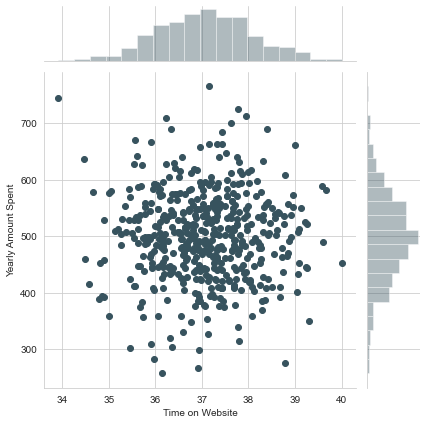

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

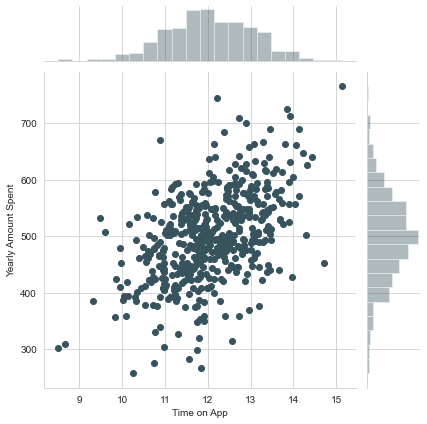

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

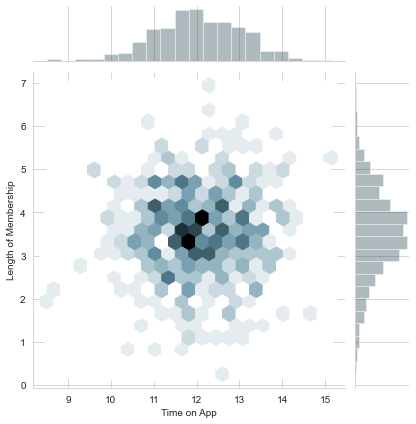

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

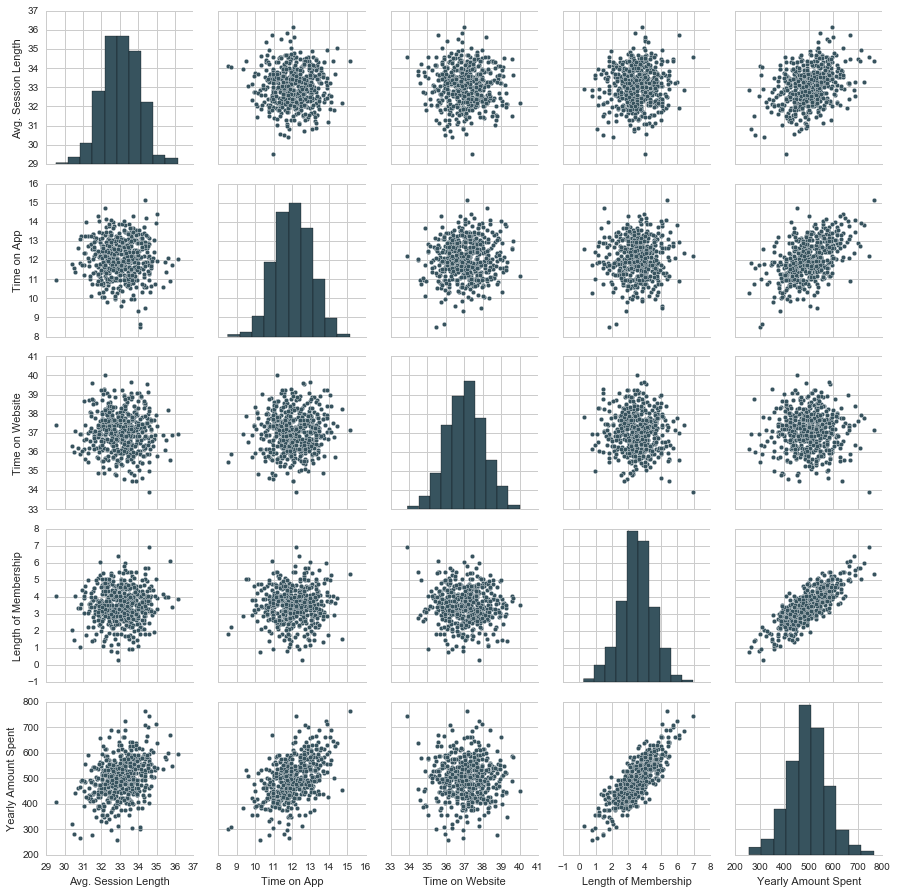

In [284]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

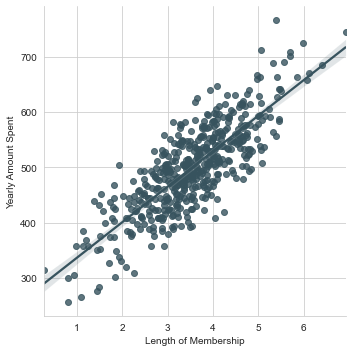

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Remove Multi - collinearity

Quickly check for vifs and Correlation coefficients.
Homework - Try removing one variable at a time and look at differential results 

In [12]:
customers.corr(method='spearman') 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.020668,-0.030324,0.027901,0.336162
Time on App,-0.020668,1.000000,0.052824,0.007308,0.473392
Time on Website,-0.030324,0.052824,1.000000,-0.022700,-0.000414
Length of Membership,0.027901,0.007308,-0.022700,1.000000,0.779915
Yearly Amount Spent,0.336162,0.473392,-0.000414,0.779915,1.000000


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
print(calc_vif(X))

X = customers[['Time on App', 'Length of Membership']]
print(calc_vif(X))

X = customers[['Avg. Session Length', 'Length of Membership']]
print(calc_vif(X))

X = customers[['Time on Website', 'Length of Membership']]
print(calc_vif(X))

X = customers[['Time on App', 'Length of Membership']]
print(calc_vif(X))



              variables         VIF
0   Avg. Session Length  613.185924
1           Time on App  144.019714
2       Time on Website  658.495572
3  Length of Membership   13.578801
              variables        VIF
0           Time on App  12.671665
1  Length of Membership  12.671665
              variables        VIF
0   Avg. Session Length  13.549083
1  Length of Membership  13.549083
              variables        VIF
0       Time on Website  13.283324
1  Length of Membership  13.283324
              variables        VIF
0           Time on App  12.671665
1  Length of Membership  12.671665


## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [17]:
y = customers['Yearly Amount Spent']

In [34]:
X1 = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X2 = customers[['Length of Membership','Time on App']]
X3 = customers[['Time on App']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [35]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [46]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [47]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [49]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [50]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

** Create a scatterplot of the real test values versus the predicted values. **

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [56]:
# calculate these metrics by hand!
from sklearn import metrics


print('Train metrics :\nMAE:', metrics.mean_absolute_error(y_train, lm.predict( X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lm.predict( X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lm.predict( X_train))))


print('\nTest metrics :\nMAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


print('\nTrain : Rsquared & Adjusted R Square : ',lm.score(X_train, y_train),",", 1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('Test : Rsquared & Adjusted R Square : ',lm.score(X_test, y_test),",", 1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



Train metrics :
MAE: 8.181347287342826
MSE: 106.85137432285705
RMSE: 10.336893843067996

Test metrics :
MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642

Train : Rsquared & Adjusted R Square :  0.9817562058732432 , 0.9815446836224981
Test : Rsquared & Adjusted R Square :  0.9890046246741234 , 0.9887013039754785


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

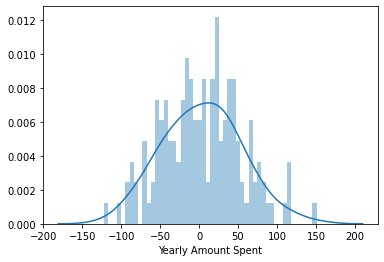

In [53]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [57]:
coeffecients = pd.DataFrame(lm.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
